In [8]:
# https://zipline.ml4trading.io/bundles.html#ingesting-data
# https://pyfolio.ml4trading.io/notebooks/zipline_algo_example.html

#Address of zipline
# C:\Users\avi\anaconda3\envs\env_zipline\Lib\site-packages\zipline

# https://zipline.ml4trading.io/api-reference.html

In [4]:
#See the last ingested data status for different bundles in zipline, need to regularly ingest data using 
#zipline ingest -b quandl

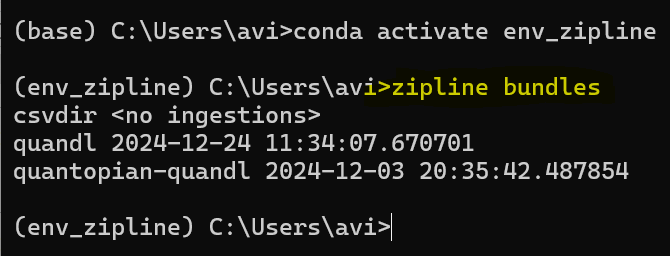

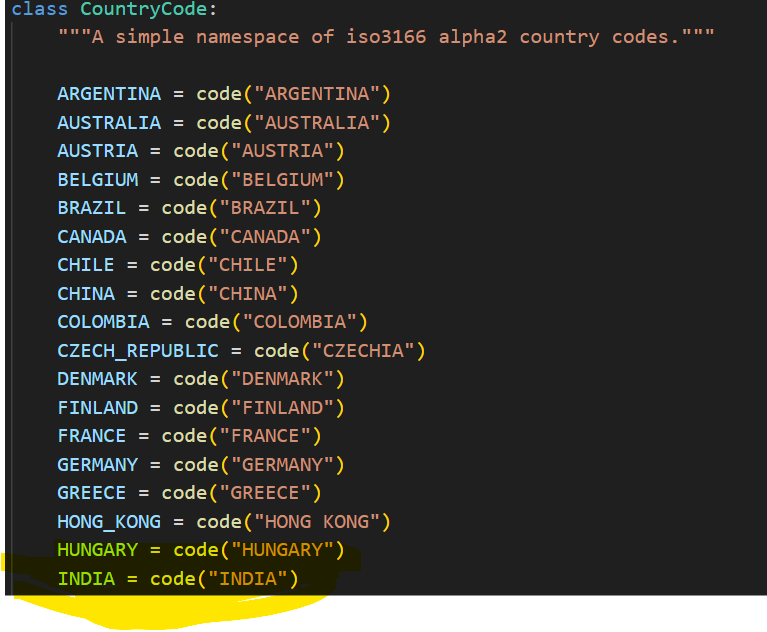

In [1]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf

import warnings
warnings.filterwarnings('ignore')

import numpy as np
# np.NINF=  np.inf #correced in utils.py file
# pd.Series.iteritems = pd.Series.items #correced in utils.py file, plotting.py file
# pd.to_pydatetime = pd.to_datetime #corrected as per https://stackoverflow.com/questions/63554616/attributeerror-numpy-int64-object-has-no-attribute-to-pydatetime


In [ ]:
zipline.api(order_target_percent())

for data 
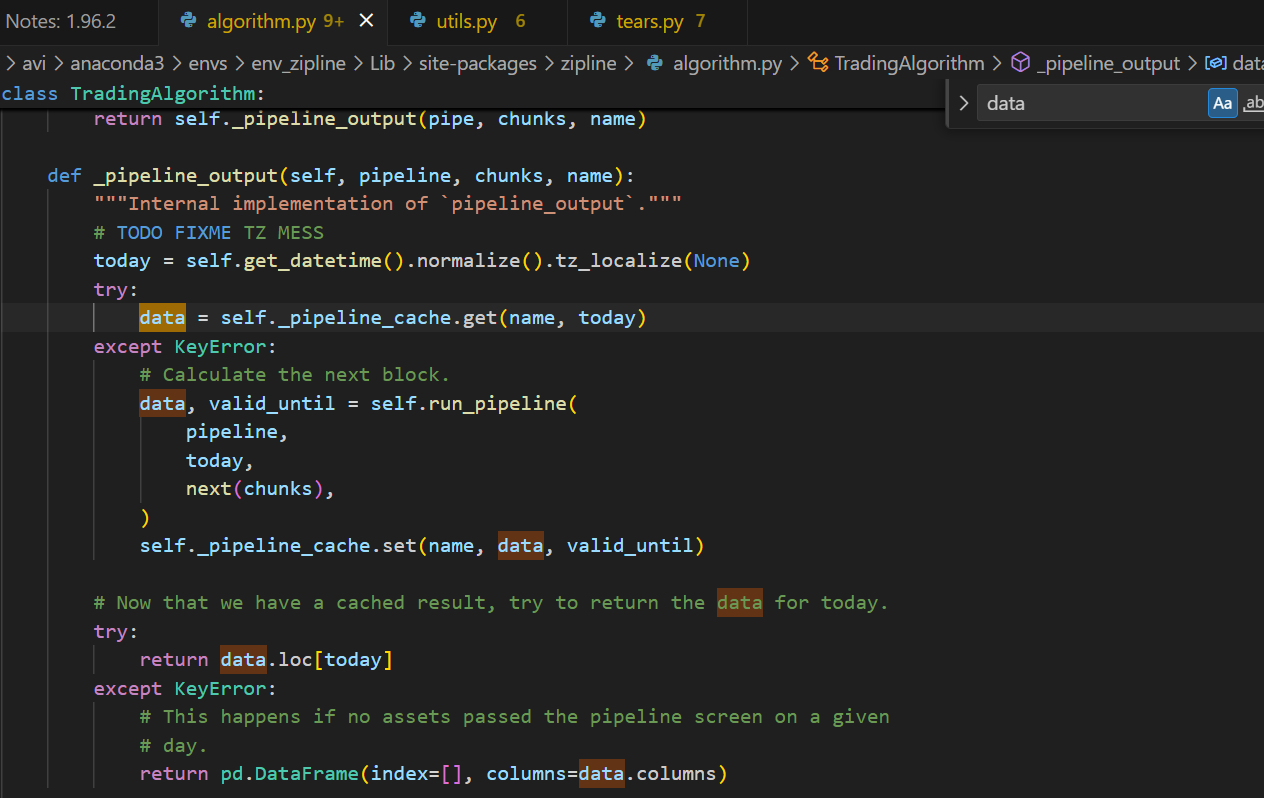


In [5]:
#from zipline.algorithm import TradingAlgorithm 
"""
class TradingAlgorithm: 
A class that represents a trading strategy and parameters to execute the strategy.

Parameters
    ----------
    *args, **kwargs
        Forwarded to ``initialize`` unless listed below.
    initialize : callable[context -> None], optional
        Function that is called at the start of the simulation to
        setup the initial context.
    handle_data : callable[(context, data) -> None], optional
        Function called on every bar. This is where most logic should be
        implemented.
    before_trading_start : callable[(context, data) -> None], optional
        Function that is called before any bars have been processed each
        day.
    analyze : callable[(context, DataFrame) -> None], optional
        Function that is called at the end of the backtest. This is passed
        the context and the performance results for the backtest.
    script : str, optional
        Algoscript that contains the definitions for the four algorithm
        lifecycle functions and any supporting code.
    namespace : dict, optional
        The namespace to execute the algoscript in. By default this is an
        empty namespace that will include only python built ins.
    algo_filename : str, optional
        The filename for the algoscript. This will be used in exception
        tracebacks. default: '<string>'.
    data_frequency : {'daily', 'minute'}, optional
        The duration of the bars.
    equities_metadata : dict or DataFrame or file-like object, optional
        If dict is provided, it must have the following structure:
        * keys are the identifiers
        * values are dicts containing the metadata, with the metadata
          field name as the key
        If pandas.DataFrame is provided, it must have the
        following structure:
        * column names must be the metadata fields
        * index must be the different asset identifiers
        * array contents should be the metadata value
        If an object with a ``read`` method is provided, ``read`` must
        return rows containing at least one of 'sid' or 'symbol' along
        with the other metadata fields.
    futures_metadata : dict or DataFrame or file-like object, optional
        The same layout as ``equities_metadata`` except that it is used
        for futures information.
    identifiers : list, optional
        Any asset identifiers that are not provided in the
        equities_metadata, but will be traded by this TradingAlgorithm.
    get_pipeline_loader : callable[BoundColumn -> PipelineLoader], optional
        The function that maps pipeline columns to their loaders.
    create_event_context : callable[BarData -> context manager], optional
        A function used to create a context mananger that wraps the
        execution of all events that are scheduled for a bar.
        This function will be passed the data for the bar and should
        return the actual context manager that will be entered.
    history_container_class : type, optional
        The type of history container to use. default: HistoryContainer
    platform : str, optional
        The platform the simulation is running on. This can be queried for
        in the simulation with ``get_environment``. This allows algorithms
        to conditionally execute code based on platform it is running on.
        default: 'zipline'
    adjustment_reader : AdjustmentReader
        The interface to the adjustments.
    """



This strategy is to own a financial asset if its latest stock price is above the average price
over the last X days.
In the following example, it works well for Apple stock and a period of 90 days:

In [2]:
def initialize(context): 
    context.stock = symbol('AAPL') #Lookup an Equity by its ticker symbol, symbol(self, symbol_str, country_code=None)
    context.rolling_window = 90 
    set_commission(PerTrade(cost=5)) #Sets the commission models for the simulation.

                                    #Parameters                                       
                                    #us_equities : EquityCommissionModel
                                    #The commission model to use for trading US equities.
                                    #us_futures : FutureCommissionModel
                                    #The commission model to use for trading US futures.



def handle_data(context, data): 
#     price_hist = data.history(context.stock, 'close', context.rolling_window, "1d")
    
    price_hist = data.history(context.stock, ['open', 'close', 'volume','price'], context.rolling_window, "1d")
    print(price_hist)
    
    # found in zipline.data.history_loader.py 
    """
     def history(self, assets, dts, field, is_perspective_after): 
       A window of pricing data with adjustments applied assuming that the
        end of the window is the day before the current simulation time.

        Parameters
        ----------
        assets : iterable of Assets
            The assets in the window.
        dts : iterable of datetime64-like
            The datetimes for which to fetch data.
            Makes an assumption that all dts are present and contiguous,
            in the calendar.
        field : str
            The OHLCV field for which to retrieve data.
        is_perspective_after : bool
            True, if the window is being viewed immediately after the last dt
            in the sliding window.
            False, if the window is viewed on the last dt.

            This flag is used for handling the case where the last dt in the
            requested window immediately precedes a corporate action, e.g.:

            - is_perspective_after is True

            When the viewpoint is after the last dt in the window, as when a
            daily history window is accessed from a simulation that uses a
            minute data frequency, the history call to this loader will not
            include the current simulation dt. At that point in time, the raw
            data for the last day in the window will require adjustment, so the
            most recent adjustment with respect to the simulation time is
            applied to the last dt in the requested window.

            An example equity which has a 0.5 split ratio dated for 05-27,
            with the dts for a history call of 5 bars with a '1d' frequency at
            05-27 9:31. Simulation frequency is 'minute'.

            (In this case this function is called with 4 daily dts, and the
             calling function is responsible for stitching back on the
             'current' dt)

            |       |       |       |       | last dt | <-- viewer is here |
            |       | 05-23 | 05-24 | 05-25 | 05-26   | 05-27 9:31         |
            | raw   | 10.10 | 10.20 | 10.30 | 10.40   |                    |
            | adj   |  5.05 |  5.10 |  5.15 |  5.25   |                    |

            The adjustment is applied to the last dt, 05-26, and all previous
            dts.

            - is_perspective_after is False, daily

            When the viewpoint is the same point in time as the last dt in the
            window, as when a daily history window is accessed from a
            simulation that uses a daily data frequency, the history call will
            include the current dt. At that point in time, the raw data for the
            last day in the window will be post-adjustment, so no adjustment
            is applied to the last dt.

            An example equity which has a 0.5 split ratio dated for 05-27,
            with the dts for a history call of 5 bars with a '1d' frequency at
            05-27 0:00. Simulation frequency is 'daily'.

            |       |       |       |       |       | <-- viewer is here |
            |       |       |       |       |       | last dt            |
            |       | 05-23 | 05-24 | 05-25 | 05-26 | 05-27              |
            | raw   | 10.10 | 10.20 | 10.30 | 10.40 | 5.25               |
            | adj   |  5.05 |  5.10 |  5.15 |  5.20 | 5.25               |

            Adjustments are applied 05-23 through 05-26 but not to the last dt,
            05-27

        Returns
        -------
        out : np.ndarray with shape(len(days between start, end), len(assets))
        """
    
    
    order_target_percent(context.stock, 1.0 if price_hist[-1] > price_hist.mean() else 0.0) 
    
    '''
    Place an order to adjust a position to a target percent of the
    current portfolio value. If the position doesn't already exist, this is
    equivalent to placing a new order. If the position does exist, this is
    equivalent to placing an order for the difference between the target
    percent and the current percent.

    Parameters
    ----------
    asset : Asset
        The asset that this order is for.
    target : float
        The desired percentage of the portfolio value to allocate to
        ``asset``. This is specified as a decimal, for example:
        0.50 means 50%.
    limit_price : float, optional
        The limit price for the order.
    stop_price : float, optional
        The stop price for the order.
    style : ExecutionStyle
        The execution style for the order.

    Returns
    -------
    order_id : str
        The unique identifier for this order.
    '''
    
    
    
    

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) #see Example_Zipline.ipynb in Possible_Project folder to understand better 
    
    '''
    extract_rets_pos_txn_from_zipline(perf)
    Extract returns, positions, transactions and leverage from the
    backtest data structure returned by zipline.TradingAlgorithm.run().

    The returned data structures are in a format compatible with the
    rest of pyfolio and can be directly passed to
    e.g. tears.create_full_tear_sheet().
    
    Parameters
    ----------
    backtest : pd.DataFrame
        DataFrame returned by zipline.TradingAlgorithm.run() #run() just runs TradingAlgorithm

    Returns
    -------
    returns : pd.Series
        Daily returns of strategy.
         - See full explanation in tears.create_full_tear_sheet.
    positions : pd.DataFrame
        Daily net position values.
         - See full explanation in tears.create_full_tear_sheet.
    transactions : pd.DataFrame
        Prices and amounts of executed trades. One row per trade.
         - See full explanation in tears.create_full_tear_sheet.
     
     
     Example (on the Quantopian research platform)
    ---------------------------------------------
    >>> backtest = my_algo.run()
    >>> returns, positions, transactions =
    >>>     pyfolio.utils.extract_rets_pos_txn_from_zipline(backtest)
    >>> pyfolio.tears.create_full_tear_sheet(returns,
    >>>     positions, transactions)
    
    '''
    
    #defined in tears.py in pyfolio
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
    """
    Generate a number of plots for analyzing a strategy's returns.

    - Fetches benchmarks, then creates the plots on a single figure.
    - Plots: rolling returns (with cone), rolling beta, rolling sharpe,
        rolling Fama-French risk factors, drawdowns, underwater plot, monthly
        and annual return plots, daily similarity plots,
        and return quantile box plot.
    - Will also print the start and end dates of the strategy,
        performance statistics, drawdown periods, and the return range.

    Parameters
    ----------
    returns : pd.Series
        Daily returns of the strategy, noncumulative.
         - See full explanation in create_full_tear_sheet.
    positions : pd.DataFrame, optional
        Daily net position values.
         - See full explanation in create_full_tear_sheet.
    transactions : pd.DataFrame, optional
        Executed trade volumes and fill prices.
        - See full explanation in create_full_tear_sheet.
    live_start_date : datetime, optional
        The point in time when the strategy began live trading,
        after its backtest period.
    cone_std : float, or tuple, optional
        If float, The standard deviation to use for the cone plots.
        If tuple, Tuple of standard deviation values to use for the cone plots
         - The cone is a normal distribution with this standard deviation
             centered around a linear regression.
    benchmark_rets : pd.Series, optional
        Daily noncumulative returns of the benchmark.
         - This is in the same style as returns.
    bootstrap : boolean, optional
        Whether to perform bootstrap analysis for the performance
        metrics. Takes a few minutes longer.
    turnover_denom : str, optional
        Either AGB or portfolio_value, default AGB.
        - See full explanation in txn.get_turnover.
    header_rows : dict or OrderedDict, optional
        Extra rows to display at the top of the perf stats table.
    return_fig : boolean, optional
        If True, returns the figure that was plotted on.
    """
    
# start_date = pd.to_datetime('2000-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)
start_date = pd.Timestamp('2000-1-1')
end_date = pd.Timestamp('2018-1-1')

    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

fields                         open   close     volume   price
date                                                          
1999-08-26 Equity(8 [AAPL])   61.13   62.13  3611500.0   62.13
1999-08-27 Equity(8 [AAPL])   62.75   64.75  3989600.0   64.75
1999-08-30 Equity(8 [AAPL])   65.00   62.06  3005300.0   62.06
1999-08-31 Equity(8 [AAPL])   62.59   65.25  5665600.0   65.25
1999-09-01 Equity(8 [AAPL])   67.00   68.62  7041300.0   68.62
...                             ...     ...        ...     ...
1999-12-28 Equity(8 [AAPL])   99.12   98.19  2210500.0   98.19
1999-12-29 Equity(8 [AAPL])   96.81  100.69  2540200.0  100.69
1999-12-30 Equity(8 [AAPL])  102.19  100.31  1849500.0  100.31
1999-12-31 Equity(8 [AAPL])  100.94  102.81  1462600.0  102.81
2000-01-03 Equity(8 [AAPL])  104.87  111.94  4783900.0  111.94

[90 rows x 4 columns]


KeyError: -1

price_hist : comes up as below
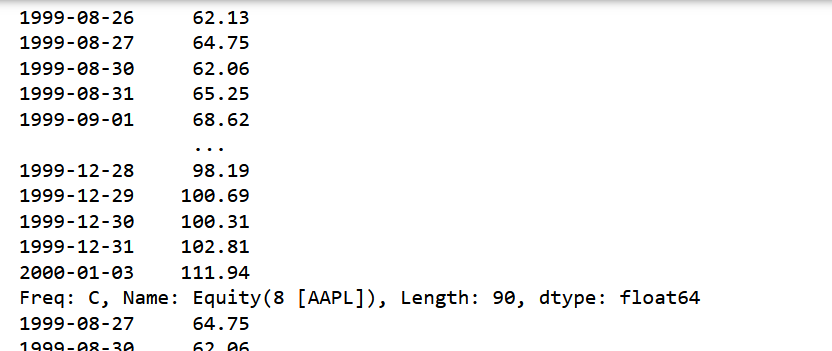
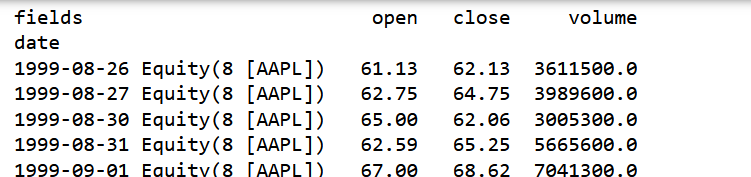

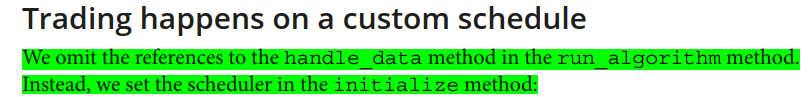
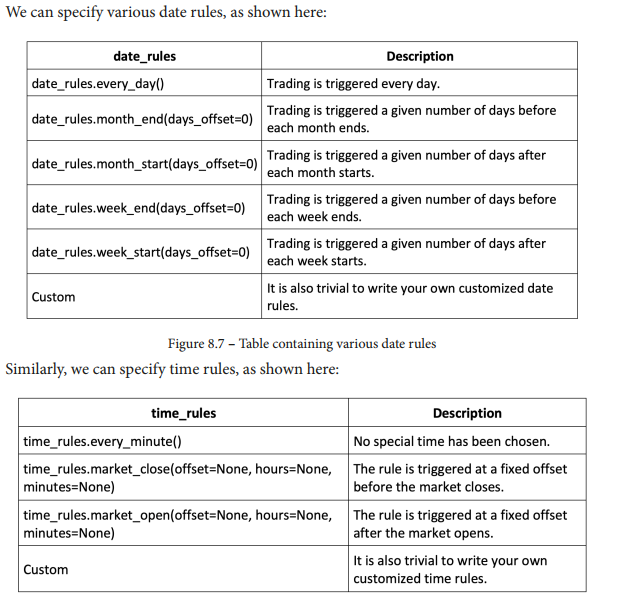

In [1]:
# The handle_data method will be called for every single month_end with the prices 1
# hour after the market opens

# schedule_function(handle_data, date_rules.month_end(),time_rules.market_open(hours=1))

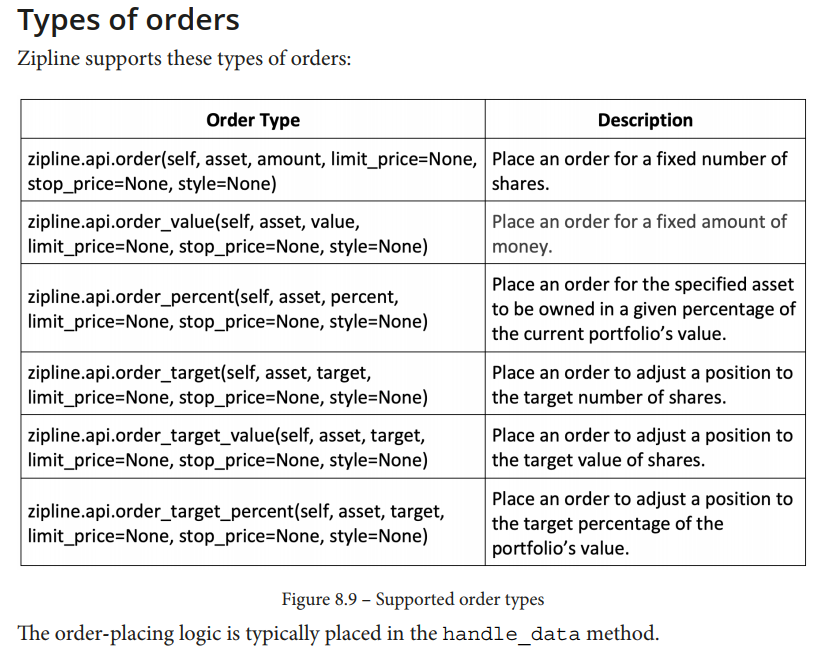

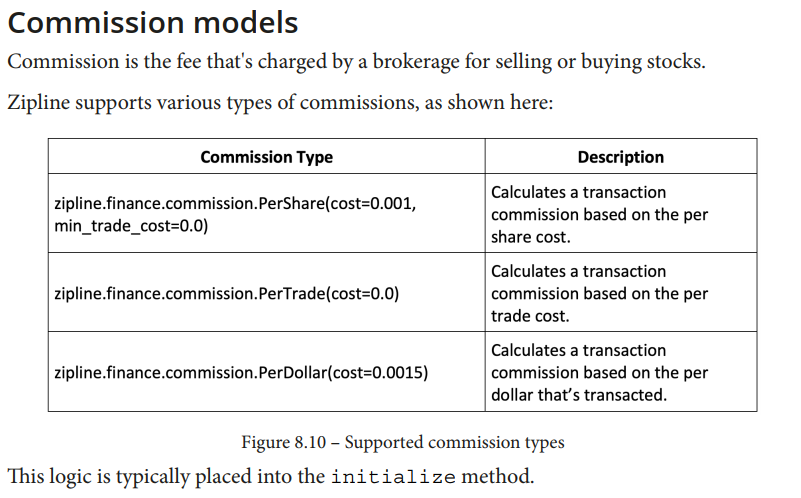

Slippage is defined as the difference between the expected price and the executed price.

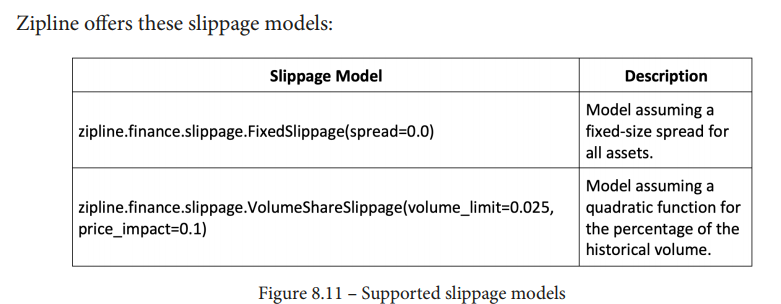

In [ ]:
#Tried yahoo_csv bundle here based on ingested data and saved in csv
#One thing to be noticed is we get different results when getting data from quandl vs when getting from yahoo finance

In [ ]:
import os
os.chdir('C:\\Users\\avi\\.zipline\\csv\\yahoo')
import pandas as pd

In [ ]:
# import yfinance as yf
# for symbol in ["SPY", "EFA", "IEF", "VNQ", "GSG","AAPL","MSFT"]:
# # for symbol in ["AAPL"]:
#     data = yf.download(symbol, multi_level_index=False )
#     data = data.loc[data.index > '1999-01-01']
#     data.to_csv('%s.csv'%symbol)

Start date,2000-01-03
End date,2017-12-29
Total months,215
,Backtest
Annual return,20.7%
Cumulative returns,2859.5%
Annual volatility,29.9%
Sharpe ratio,0.78
Calmar ratio,0.31
Stability,0.91
Max drawdown,-67.2%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,67.22,2000-03-22,2003-03-24,2005-01-14,1258
1,30.46,2015-05-22,2016-09-09,2017-05-08,512
2,26.62,2005-02-16,2005-07-18,2005-11-02,186
3,24.43,2006-01-13,2006-02-09,2006-11-09,215
4,20.96,2007-12-28,2008-04-09,2009-04-13,337


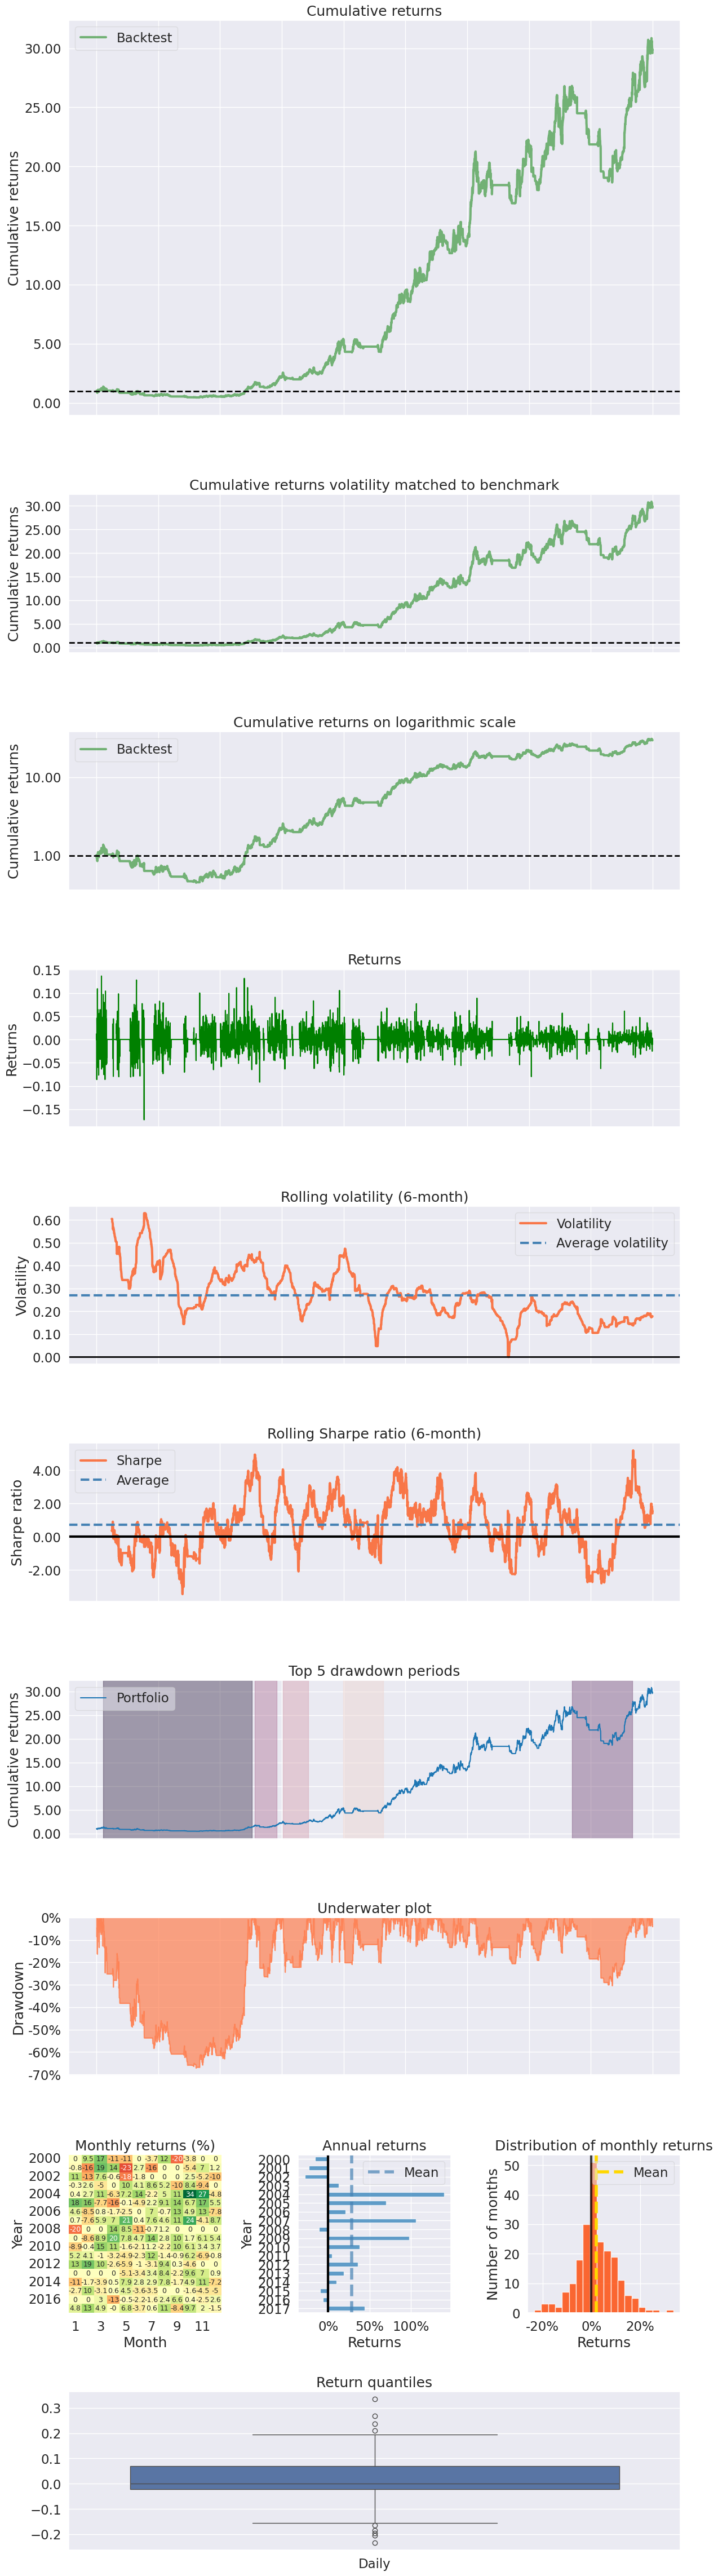

In [6]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade

import pyfolio as pf

import warnings
warnings.filterwarnings('ignore')

import numpy as np


def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 90
    set_commission(PerTrade(cost=5)) 


def handle_data(context, data): 
    price_hist = data.history(context.stock, "close", context.rolling_window, "1d")           
    order_target_percent(context.stock, 1.0 if price_hist[-1] > price_hist.mean() else 0.0) #only have capital_base and can buy accordingly ,
    #if price rises beyond mean we buy given the capital allows, esle sell

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2000-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)
start_date = pd.Timestamp('2000-1-1')
end_date = pd.Timestamp('2018-1-1')

    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize,  handle_data = handle_data, 
                        analyze = analyze,
                        capital_base = 10000, data_frequency = 'daily', 
                        #bundle ='quandl'
                        bundle ='yahoo_csv'                       
                       )
